These are my notes for Lasso (L1 Regularization) and Ridge (L2 Regularization).  I would highly recommend checking out the following resources (that I utilized)
- [Intro to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
- [Statquest Lasso Regression](https://www.youtube.com/watch?v=NGf0voTMlcs&t=1s)
- [Statquest Ridge Regression](https://www.youtube.com/watch?v=Q81RR3yKn30)
- [Statquest Ridge vs Lasso Regression, Visualized](https://www.youtube.com/watch?v=Xm2C_gTAl8c&vl=en)

#### Lasso Regression 

Lasso regression minimizes the following equation: 
```
MSE + lambda * np.abs(coef)
```
Lambda can be between 0 and positive infinity and lets the equation know how much to weight the lasso component of the formula. 

I'm going to create a dataset and see how my line changes as lambda increases.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [16]:
df = pd.DataFrame({'x': [2, 4, 6, 7, 8], 'y':[3, 6.5, 8, 9, 8.5]})

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3189655172413792, tolerance: 0.00235
  positive)


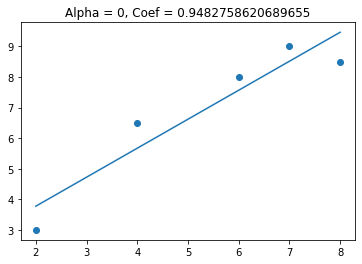

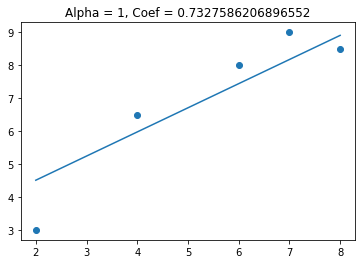

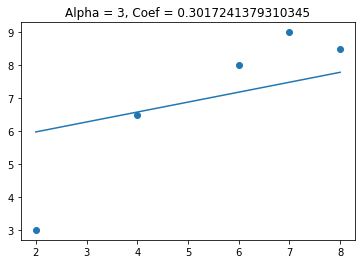

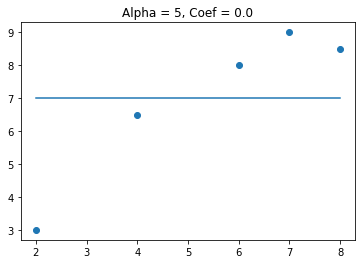

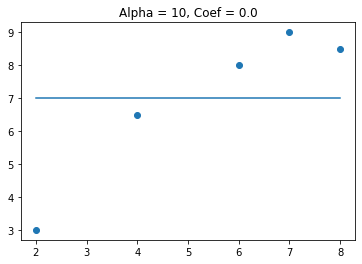

In [18]:
for i in [0, 1, 3, 5, 10]:
    lasso = Lasso(alpha=i)
    lasso.fit(df['x'].values.reshape(-1, 1), df['y'])
    plt.scatter(df['x'], df['y'])
    plt.plot(df['x'], lasso.predict(df['x'].values.reshape(-1, 1)))
    plt.title(f'Alpha = {i}, Coef = {lasso.coef_[0]}')
    plt.show()

We see that when alpha gets above 3 the coefficient goes to zero.  This can be useful when I have features that are not needed for predicting the target variable.  Lets see what happens when I add a feature that is not useful in predicting the target variable. 

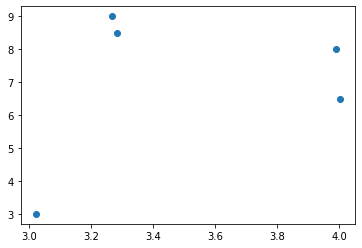

In [28]:
# create random variable 
import numpy as np
np.random.seed(9)
df['x1'] = np.random.uniform(3, 5, 5)

# plot out new feature
plt.scatter(df['x1'], df['y']);

We see there is not a linear relationship between the `x1` and `y`.  Lets see how the coefficients changes as lambda increases. 

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5865059511050739, tolerance: 0.00235
  positive)


Text(0, 0.5, 'Coefficient Value')

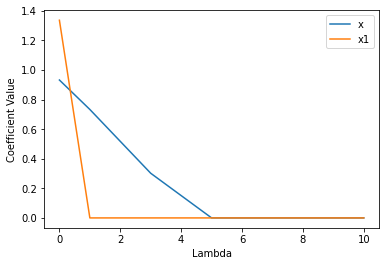

In [50]:
x_coef = []
x2_coef = []
for i in [0, 1, 3, 5, 10]:
    lasso = Lasso(alpha=i)
    lasso.fit(df[['x', 'x1']], df['y'])
    x_coef.append(lasso.coef_[0])
    x2_coef.append(lasso.coef_[1])
plt.plot([0, 1, 3, 5, 10], x_coef, label = 'x')
plt.plot([0, 1, 3, 5, 10], x2_coef, label = 'x1')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')

We see that `x2` goes to zero much quicker than `x`, this is because `x` is a useful feature and `x2` is not. 

When using lasso regression, we need to find the best parameter for the lambda.  I am going to do that using LassoCV

In [43]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV()
lassocv.fit(df[['x', 'x1']], df['y'])
lassocv.alpha_

0.02042299086789623

We see that the optimal value of lambda is `0.02`.  Now I am going to look at Ridge Regression 

#### Ridge Regression 

Lasso regression minimizes the following equation: 
```
MSE + lambda * coef**2
```
Lambda can be between 0 and positive infinity and lets the equation know how much to weight the lasso component of the formula. 

Again I am going to look at the slope as lambda changes 

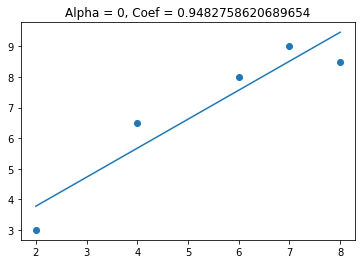

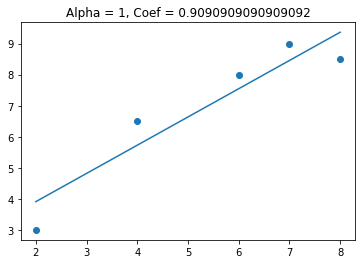

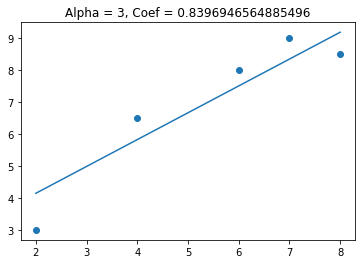

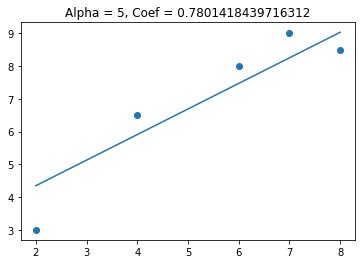

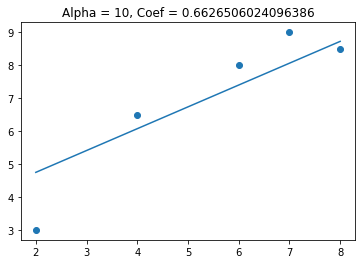

In [48]:
from sklearn.linear_model import Ridge

for i in [0, 1, 3, 5, 10]:
    ridge = Ridge(alpha=i)
    ridge.fit(df['x'].values.reshape(-1, 1), df['y'])
    plt.scatter(df['x'], df['y'])
    plt.plot(df['x'], ridge.predict(df['x'].values.reshape(-1, 1)))
    plt.title(f'Alpha = {i}, Coef = {ridge.coef_[0]}')
    plt.show()

This time we see that the coefficient gets smaller, but doesn't get to zero.  Lets see what happens to the coefficients when I have 2 variables in my model (one useful and one not useful). 

Text(0, 0.5, 'Coefficient Value')

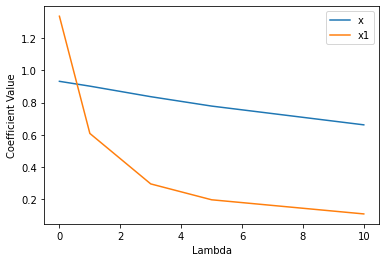

In [51]:
x_coef = []
x2_coef = []
for i in [0, 1, 3, 5, 10]:
    ridge = Ridge(alpha=i)
    ridge.fit(df[['x', 'x1']], df['y'])
    x_coef.append(ridge.coef_[0])
    x2_coef.append(ridge.coef_[1])
plt.plot([0, 1, 3, 5, 10], x_coef, label = 'x')
plt.plot([0, 1, 3, 5, 10], x2_coef, label = 'x1')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')

This time we see that `x` goes down slightly while `x1` decreases more significantly.  This makes sense because `x1` is not useful.  

Like Lasso Regression, I need to find the optimal value of lambda for ridge regression. 

In [52]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV()
ridgecv.fit(df[['x', 'x1']], df['y'])
ridgecv.alpha_

1.0

#### Comparison of Lasso and Ridge Regression

Now I am going to compare the performance of Lasso and Ridge Regression 

In [174]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 1000, n_features = 100, n_informative=10, random_state=11, noise = 20)

I have 1000 rows, 100 predictors, with only 10 of them informative.  Lets see whether Lasso, Ridge, or Linear Regression does best.  

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

Start with Linear Regression 

In [176]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# calculate MSE 
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, lr.predict(X_test))
print(lr_mse)

457.0964335435198


In [177]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)

lasso_mse = mean_squared_error(y_test, lassocv.predict(X_test))
print(lasso_mse)

404.06019286558563


In [178]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)

ridge_mse = mean_squared_error(y_test, ridgecv.predict(X_test))
print(ridge_mse)

456.85177007126435


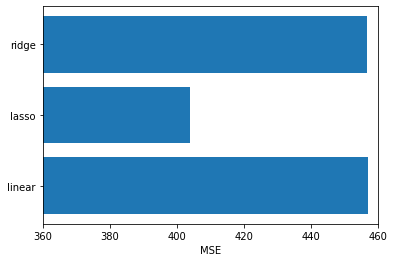

In [180]:
plt.barh(y = ['linear', 'lasso', 'ridge'], width = [lr_mse, lasso_mse, ridge_mse])
plt.xlim([360, 460])
plt.xlabel('MSE');

We see that lasso regression has the lowest MSE.  This is because there are 100 features and only 10 of them are useful.  Lasso regression is removing a lot of those non-useful features and giving them a 0 coefficient. 

In [181]:
f'Lasso used {np.sum(lassocv.coef_ != 0)} features'

'Lasso used 35 features'

In [182]:
f'Ridge used {np.sum(ridgecv.coef_ != 0)} features'

'Ridge used 100 features'

Lasso regression can be used as a feature selection technique.  Lets use the features that Lasso selected and use it with ridge regression. 

In [183]:
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

In [184]:
lasso_df_train = df_train.loc[:, lassocv.coef_ != 0]
lasso_df_test = df_test.loc[:, lassocv.coef_ != 0]

In [185]:
ridgecv = RidgeCV()
ridgecv.fit(lasso_df_train, y_train)

ridge_mse_with_lasso = mean_squared_error(y_test, ridgecv.predict(lasso_df_test))

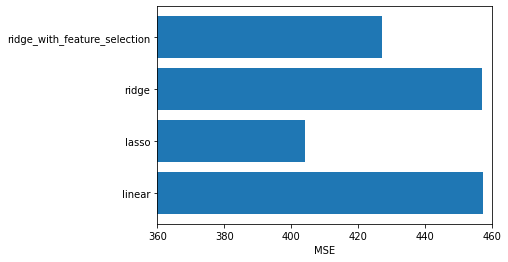

In [186]:
plt.barh(y = ['linear', 'lasso', 'ridge', 'ridge_with_feature_selection'], 
         width = [lr_mse, lasso_mse, ridge_mse, ridge_mse_with_lasso])
plt.xlim([360, 460])
plt.xlabel('MSE');

We see that using the feature selection improved the performance of the ridge regression, but lasso regression is still the best performing model.  

Now lets see what happens if we make a small dataset and all the features are informative. 

In [187]:
X, y = make_regression(n_samples = 50, n_features = 10, n_informative=10, random_state=11, noise = 10)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [189]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# calculate MSE 
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, lr.predict(X_test))
print(lr_mse)

61.76711409271062


In [190]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)

lasso_mse = mean_squared_error(y_test, lassocv.predict(X_test))
print(lasso_mse)

59.06356274259228


In [191]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)

ridge_mse = mean_squared_error(y_test, ridgecv.predict(X_test))
print(ridge_mse)

57.86644722800123


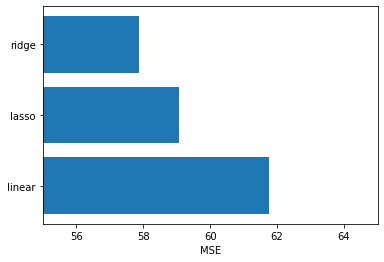

In [192]:
plt.barh(y = ['linear', 'lasso', 'ridge'], width = [lr_mse, lasso_mse, ridge_mse])
plt.xlim([55, 65])
plt.xlabel('MSE');

Now we see that Ridge Regression is the best performing model.  This makes sense because all the features are useful.  

#### Why does Lasso have 0 coefficients but Ridge does not? 

I am going to use my original dataset that I have below.  

In [193]:
df = pd.DataFrame({'x': [2, 4, 6, 7, 8], 'y':[3, 6.5, 8, 9, 8.5]})

Next I am going to try see what the optimum coefficient level for each lambda.  I am going to do this by plotting coefficient along the x axis and the MSE + Ridge Penalty is at the different lambda levels. 

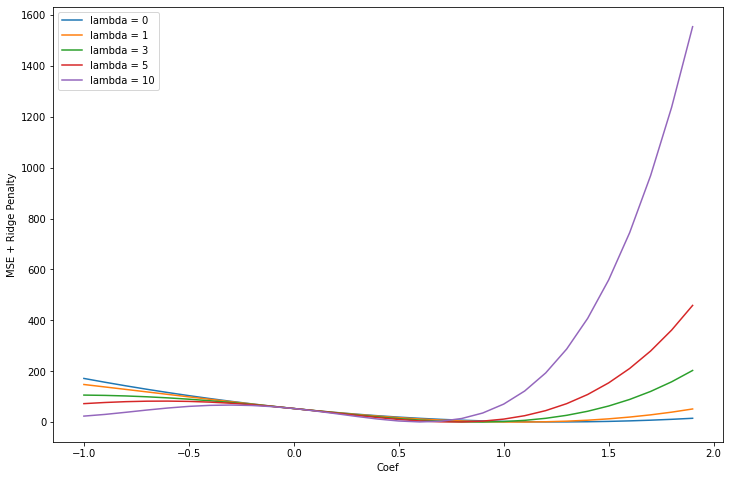

In [248]:
plt.figure(figsize = (12, 8))
for lam in [0, 1, 3, 5, 10]:
    mse = []
    for i in np.arange(-1, 2, .1):
        mse.append(mean_squared_error(df['y'], df['x'] * i + (lam * (i **2))))
    plt.plot(np.arange(-1, 2, .1), mse, label = f'lambda = {lam}')
    plt.legend()
plt.ylabel('MSE + Ridge Penalty')
plt.xlabel('Coef');

I see that as lambda increases the minimum value for the coefficient gets smaller and smaller.  Also, important to note is that the graph is still smooth.  

Lets see what happens when we do this with Lasso Regression. 

Text(0.5, 0, 'Coef')

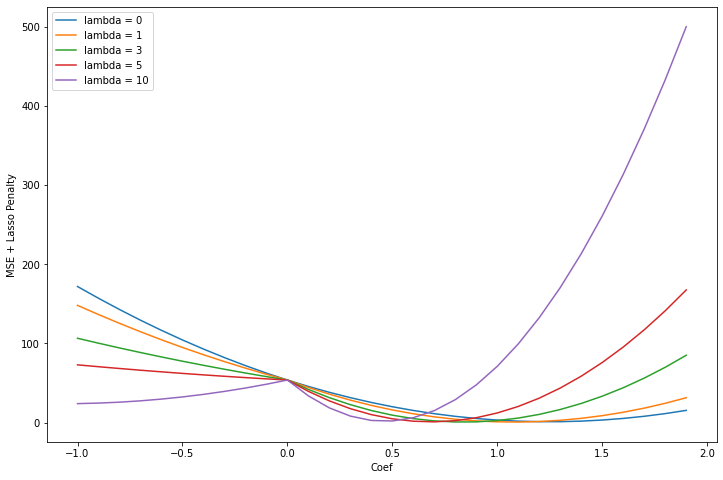

In [249]:
plt.figure(figsize = (12, 8))
for lam in [0, 1, 3, 5, 10]:
    mse = []
    for i in np.arange(-1, 2, .1):
        mse.append(mean_squared_error(df['y'], df['x'] * i + (lam * np.abs(i))))
    plt.plot(np.arange(-1, 2, .1), mse, label = f'lambda = {lam}')
    plt.legend()
plt.ylabel('MSE + Lasso Penalty')
plt.xlabel('Coef')

We notice there is a pronounced kink at 0.  This is caused by the absolute value term from the lasso penalty.  As the lambda coefficient gets larger, it gets more pronounced.  Lets see what happens if I choose even larger values for lambda. 

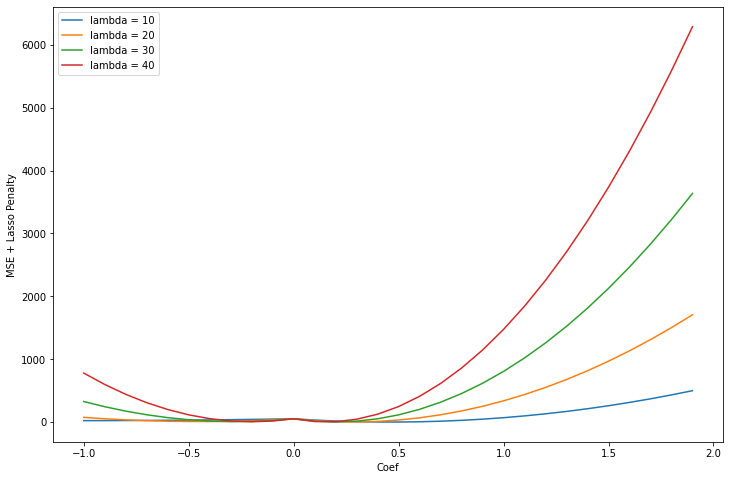

In [250]:
plt.figure(figsize = (12, 8))
for lam in [10, 20, 30, 40]:
    mse = []
    for i in np.arange(-1, 2, .1):
        mse.append(mean_squared_error(df['y'], df['x'] * i + (lam * np.abs(i))))
    plt.plot(np.arange(-1, 2, .1), mse, label = f'lambda = {lam}')
    plt.legend()
    plt.ylabel('MSE + Lasso Penalty')
    plt.xlabel('Coef')

We see that the kink at 0 ends up being very near the optimum value for the coefficient. 